예전에 Time-Series Prediction Keras 예제라서 작성한적 있으나 패턴이 Time-Series일뿐 입력값을 Time-Series로 주는게 아니므로 LSTM의 장점을 살리기 어렵다. 실제로 Dense 만으로도 훨씬 더 높은 정확도를 보인다. 파라미터 수도 1/10에 불과하다.

In [92]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions, plot_history

In [113]:
'''Example script showing how to use stateful RNNs
to model long sequences efficiently.
'''
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Flatten
from keras_tqdm import TQDMNotebookCallback

# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
epochs = 25

print('Generating Data...')
cos = np.zeros((50000, 1, 1))
X_train = np.zeros((25000, 1, 1))
X_test = np.zeros((25000, 1, 1))
y_train = np.zeros((25000, 1))
y_test = np.zeros((25000, 1))
import math
for i in range(len(cos)):
    idx = 0 + i * 1
    cos[i, 0, 0] = 100 * np.cos(2 * np.pi * idx / 1000)
    cos[i, 0, 0] = cos[i, 0, 0] * np.exp(-0.0001 * idx)
    if (i % 2 == 0):
        X_train[math.ceil(i/2), 0 , 0] = cos[i, 0, 0]
    else:
        X_test[math.ceil(i/2)-1, 0, 0] = cos[i, 0, 0]

print('Input shape:', cos.shape)

expected_output = np.zeros((len(cos), 1))
for i in range(len(cos) - 1):
    expected_output[i, 0] = np.mean(cos[i + 1:i + 1 + 1])
    if (i % 2 == 0):
        y_train[math.ceil(i/2), 0] = expected_output[i, 0]
    else:
        y_test[math.ceil(i/2)-1, 0] = expected_output[i, 0]

print('Output shape:', expected_output.shape)

Generating Data...
Input shape: (50000, 1, 1)
Output shape: (50000, 1)


In [114]:
X_train[99], y_train[99], X_test[99], y_test[99]

(array([[ 31.46514245]]),
 array([ 30.87802452]),
 array([[ 30.87802452]]),
 array([ 30.28980479]))

In [115]:
X_train.shape, y_train.shape

((25000, 1, 1), (25000, 1))

In [177]:
model = Sequential()
model.add(GRU(50,
               input_shape=(tsteps, 1),
               return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, 1, 50)             7800      
_________________________________________________________________
gru_23 (GRU)                 (None, 50)                15150     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 51        
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________


In [183]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=0, validation_data=(X_test, y_test),
                    callbacks=[TQDMNotebookCallback(show_inner=True)])

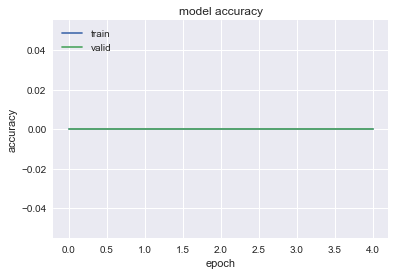

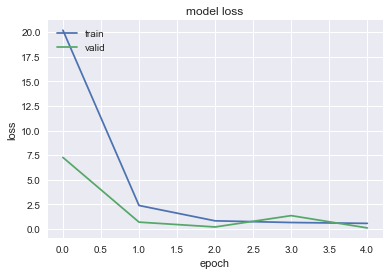

In [187]:
plot_history(history)

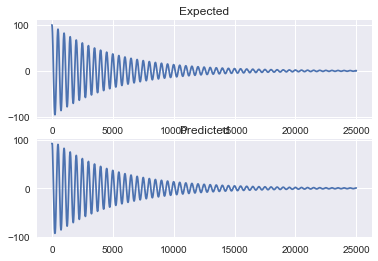

In [184]:
predicted_output = model.predict(X_test)

plt.subplot(2, 1, 1)
plt.plot(y_test)
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')
plt.show()

In [171]:
model = Sequential()
model.add(Dense(1,input_shape=(tsteps, 1)))
model.add(Dense(1))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1, 1)              2         
_________________________________________________________________
dense_41 (Dense)             (None, 1, 1)              2         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [180]:
history = model.fit(X_train, y_train,
                    epochs=1,
                    verbose=0, validation_data=(X_test, y_test),
                    callbacks=[TQDMNotebookCallback(show_inner=True)])

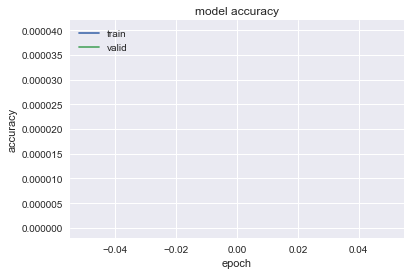

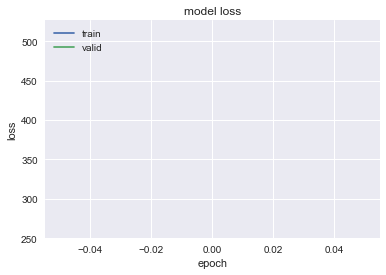

In [147]:
plot_history(history)

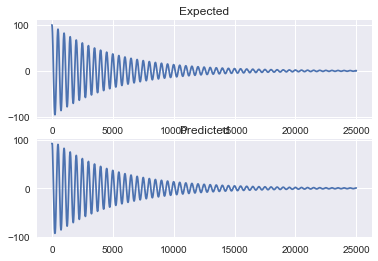

In [186]:
predicted_output = model.predict(X_test)

plt.subplot(2, 1, 1)
plt.plot(y_test)
plt.title('Expected')

plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')


In [176]:
predicted_output

array([[ 99.38249969],
       [ 99.34693909],
       [ 99.29570007],
       ..., 
       [  0.67259991],
       [  0.67267758],
       [  0.67264938]], dtype=float32)

In [141]:
x = np.array(99)
x.reshape(1)
x.shape
# model.predict(np.array(x))

()

In [185]:
predicted_output = model.predict(X_test)
predicted_output

array([[ 92.3993988 ],
       [ 92.39915466],
       [ 92.39878845],
       ..., 
       [  0.87392342],
       [  0.87400132],
       [  0.87397271]], dtype=float32)